<a href="https://colab.research.google.com/github/tejaswinirb1/ML_observations/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn scikit-learn


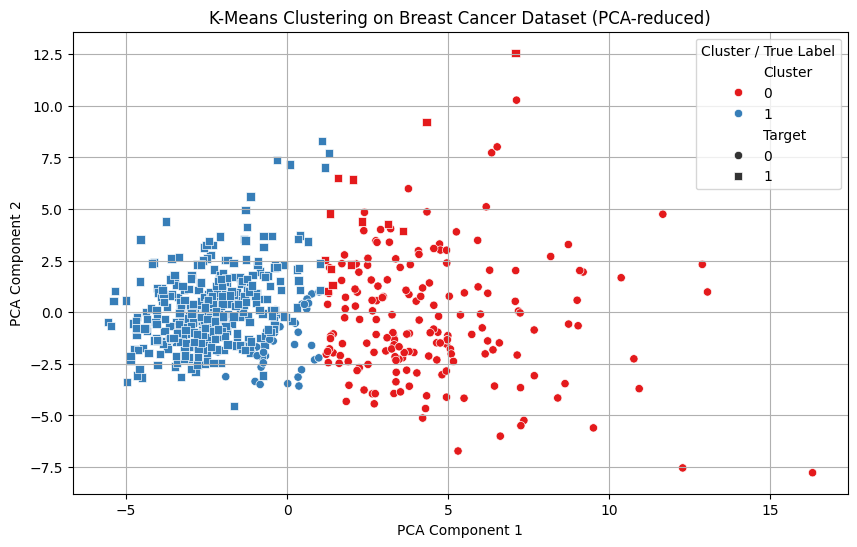

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster results to the DataFrame
df['Cluster'] = clusters

# Optional: Compare with actual labels
df['Target'] = data.target  # 0 = malignant, 1 = benign

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    style='Target',  # show true labels as style (optional)
    markers=['o', 's']
)
plt.title("K-Means Clustering on Breast Cancer Dataset (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster / True Label')
plt.grid(True)
plt.show()
